# VotingChainladder Basics

In [2]:
import chainladder as cl
import numpy as np
import pandas as pd

This example demonstrates how you can can use the Voting Chainladder method.


In [3]:
# Load the data
raa = cl.load_sample('raa')
cl_ult = cl.Chainladder().fit(raa).ultimate_  # Chainladder Ultimate
apriori = cl_ult * 0 + (float(cl_ult.sum()) / 10)  # Mean Chainladder Ultimate

# Load estimators to vote between
bcl = cl.Chainladder()
cc = cl.CapeCod()
estimators = [('bcl', bcl), ('cc', cc)]

# Fit VotingChainladder using CC after 1987 and a blend of BCL and CC otherwise
vot = cl.VotingChainladder(
    estimators=estimators,
    weights=lambda origin: (0, 1) if origin.year > 1987 else (0.5, 0.5)
    )
vot.fit(raa, sample_weight=apriori)

# Plotting
bcl_ibnr = bcl.fit(raa).ibnr_.to_frame()
cc_ibnr = cc.fit(raa, sample_weight=apriori).ibnr_.to_frame()
vot_ibnr = vot.ibnr_.to_frame()

plot_ibnr = pd.concat([bcl_ibnr, vot_ibnr, cc_ibnr], axis=1)
plot_ibnr.columns = ['BCL', 'Voting', 'CC']

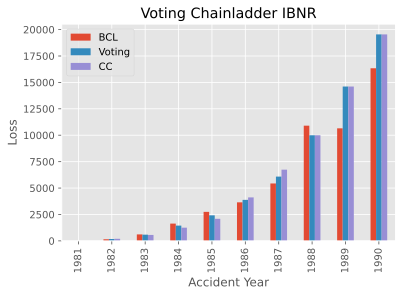

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'


ax = plot_ibnr.plot(
    kind='bar', ylim=(0, None), 
    title='Voting Chainladder IBNR',
    xlabel='Accident Year', ylabel='Loss');

In [5]:
from myst_nb import glue
glue("plot_voting_chainladder", ax.get_figure(), display=False)